
https://towardsdatascience.com/detecting-credit-card-fraud-using-machine-learning-a3d83423d3b8

https://www.kaggle.com/abdul002/credit-card-fraud-detection

https://www.kaggle.com/renjithmadhavan/credit-card-fraud-detection-using-python

https://www.sciencedirect.com/science/article/pii/S1877050918309347

https://engmrk.com/module-19-credit-card-fraud-detection/?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com

https://www.kaggle.com/mlg-ulb/creditcardfraud/kernels

https://en.wikipedia.org/wiki/Data_analysis_techniques_for_fraud_detection

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [49]:
from datetime import datetime
from typing import List, Dict
import re
from typing import List, Tuple

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.fixes import signature
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_curve, \
roc_auc_score, average_precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline 


In [63]:
# Import pandas and read csv
df_original = pd.read_csv("data/creditcard.csv")


In [3]:

# Explore the features available in your dataframe
# print(df.info())
print(df_original.shape)
print(df_original.columns)
# Count the occurrences of fraud and no fraud and print them
occ = df_original['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / occ.sum())

(284807, 31)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [4]:
normal_transaction =  df_original[df_original.Class == 0]
abnormal_transaction =  df_original[df_original.Class == 1]


# Visualization

Text(0.5, 1.0, 'Abnormal transction')

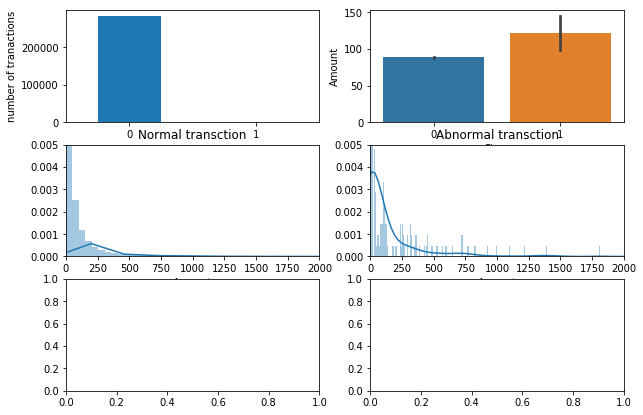

In [5]:
fig, axes = plt.subplots(3, 2, figsize=(10, 7))

df_original.Class.value_counts().plot.bar(ax=axes[0, 0], rot=0)
axes[0, 0].set_ylabel('number of tranactions')

sns.barplot(ax=axes[0, 1], data=df_original, x='Class', y='Amount')

# Plot for normal data
sns.distplot(normal_transaction.Amount, bins=500, ax=axes[1, 0])
axes[1, 0].set_xlim([0, 2000])
axes[1, 0].set_ylim([0, 0.005])
axes[1, 0].set_title('Normal transction')

# Plot for abnormal data
axes[1, 1].set_title('Abnormal transction')
sns.distplot(abnormal_transaction.Amount, bins=500, ax=axes[1, 1])
axes[1, 1].set_xlim([0, 2000])
axes[1, 1].set_ylim([0, 0.005])
axes[1, 1].set_title('Abnormal transction')

In [6]:
print('normal transaction is \n',normal_transaction.Amount.describe())
print('sum     ', normal_transaction.Amount.sum())
print('\n abnormal transaction is \n', abnormal_transaction.Amount.describe())
print('sum     ', abnormal_transaction.Amount.sum())

normal transaction is 
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
sum      25102462.04

 abnormal transaction is 
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
sum      60127.97


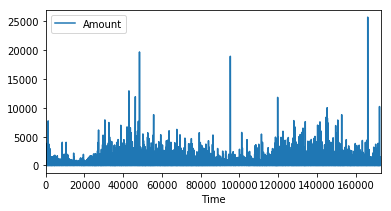

In [7]:
df_original.plot.line(x='Time', y='Amount', figsize=(6, 3))

# Pre-process the data

In [8]:
def _normalize_df(df: pd.DataFrame) -> pd.DataFrame:
    """ only normalize the PCA components, not include time and the label"""
    temp = df.drop(['Time', 'Class'], axis=1)
    temp2 = np.linalg.norm(temp, ord = 2, axis=0,keepdims = False) 
    temp3 = temp / temp2
    df_norm = pd.concat([df.Time, temp3, df.Class], axis=1)

    return df_norm



In [9]:
def normalize_data(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    """ given two dataframe, normalized them separately, then combine them into one dataframe"""
    df1 = _normalize_df(df1)
    df2 = _normalize_df(df2)
    df_norm = pd.concat([df1, df2], axis=0)
    return df_norm


In [10]:
def prep_data(df: pd.DataFrame, pca_component_names, label_column_name: str) -> Tuple[List, List]:
    """ Generate first two PCA component"""
 
    X = df[pca_component_names].to_numpy()
    y = df[label_column_name].to_numpy()
    return X, y

def plot_data(X, y):
    """create a scatter plot of our data and labels"""
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

def compare_plots(X1, y1, X2, y2):
    """create a scatter plot of our data and labels"""
    figure, axes = plt.subplots(1, 2)
    axes[0].scatter(X1[y1 == 0, 0], X1[y1 == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    axes[0].scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], label="Class #1", alpha=0.3, linewidth=0.15, c='r')
    axes[0].legend
    axes[0].set_title('first dataset')

    axes[1].scatter(X2[y2 == 0, 0], X2[y2 == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    axes[1].scatter(X2[y2 == 1, 0], X2[y2 == 1, 1], label="Class #1", alpha=0.3, linewidth=0.15, c='r')
    axes[1].legend
    axes[1].set_title('second dataset')

    return None


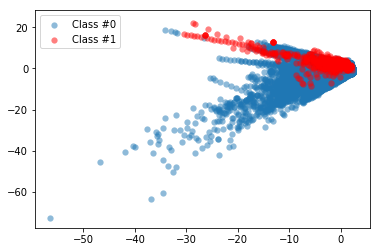

In [11]:

# Create X and y from the prep_data function 

X, y = prep_data(df_original, pca_component_names=['V1', 'V2'], label_column_name='Class')

# Plot our data by running our plot data function on X and y
plot_data(X, y)

### Oversampling in Python

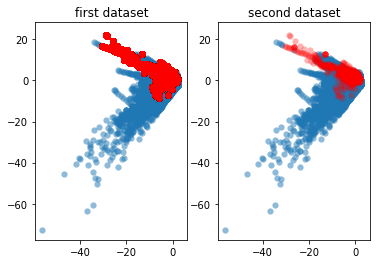

In [12]:
method = RandomOverSampler()
X_resampled, y_resampled = method.fit_sample(X, y)
compare_plots(X_resampled, y_resampled, X, y)

### resampling use SMOTE 

0    284315
1       492
dtype: int64
1    284315
0    284315
dtype: int64


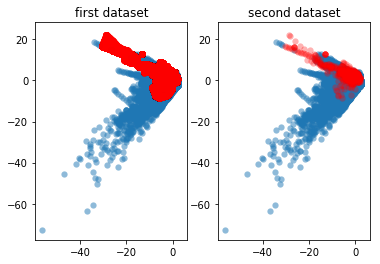

In [13]:
method = SMOTE(kind='regular')
X_resampled, y_resampled = method.fit_sample(X, y)

print(pd.value_counts(pd.Series(y)))
print(pd.value_counts(pd.Series(y_resampled)))

compare_plots(X_resampled, y_resampled, X, y)


## Exploring the traditional way to catch fraud


In [14]:
# Get the mean for each group
df_original.groupby('Class').mean()

# Implement a rule for stating which cases are flagged as fraud
df_original['flag_as_fraud'] = np.where(np.logical_and(df_original.V1 < -3,df_original.V3 < -5), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df_original.Class, df_original.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud       0     1
Actual Fraud               
0              283089  1226
1                 322   170


## Using ML classification to catch fraud


In [15]:
def split_to_features_labels(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    X = df_original.drop(['Time', 'Class'], axis=1)
    y = df_original['Class']
    
    return X, y

X, y = split_to_features_labels(df_original)

In [16]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85284    12]
 [   56    91]]


## Logistic regression combined with SMOTE


In [17]:
# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind='borderline2')
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [18]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.15      0.86      0.25       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.57      0.93      0.62     85443
weighted avg       1.00      0.99      0.99     85443

Confusion matrix:
 [[84554   742]
 [   20   127]]


In [19]:
#  the SMOTE slightly improves our results, but have a slightly higher number of false positives
# Remember, not in all cases does resampling necessarily lead to better results. When the fraud cases are 
#very spread and scattered over the data, using SMOTE can introduce a bit of bias. Nearest neighbors aren't
# necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly. In the next chapters, 
#we'll learn how to also adjust our machine learning models to better detect the minority fraud cases.

## Natural hit rate


In [20]:
X_df, y_df = split_to_features_labels(df_original)
X = X_df.to_numpy()
y = y_df.to_numpy()

In [21]:
# Count the total number of observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)

99.82725143693798


In [22]:
#  This tells us that by doing nothing, we would be correct in 95.9% of the cases. So now you understand, 
#that if we get an accuracy of less than this number, our model does not actually add any value in predicting 
#how many cases are correct. Let's see how a random forest does in predicting fraud in our data.

## Random Forest Classifier

In [23]:
X, y = split_to_features_labels(df_original)

In [24]:
# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)



c:\program files (x86)\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
def plot_precision_recall_curve(y_test: float, predicted: float):
    """Plot the recall precision tradeoff"""
    # plot_pr_curve(recall, precision, average_precision)
    
    precision, recall, _ = precision_recall_curve(y_test, predicted)
    print('precision is', precision)
    print('recall is', recall)
    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))


accuracy is 0.9994616293903538
ROC AUC is 0.9214545154959377
classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.73      0.82       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

confusion matrix 
 [[85290     6]
 [   40   107]]
average precision is 0.6897102168650336
precision is [0.00172045 0.94690265 1.        ]
recall is [1.         0.72789116 0.        ]


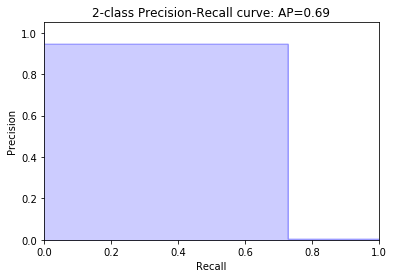

In [26]:
# Print the  performance metric
print('accuracy is', accuracy_score(y_test, predicted))

#Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
print('ROC AUC is', roc_auc_score(y_test, probs[:,1])) 


print('classification report \n', classification_report(y_test, predicted))
print('confusion matrix \n', confusion_matrix(y_test, predicted))


average_precision = average_precision_score(y_test, predicted)
print('average precision is', average_precision)

plot_precision_recall_curve(y_test, predicted)

In [27]:
# given the highly imbalanced data that you're working with. The model predicts 113 cases of fraud, out of which 107 are actual 
# fraud. You have only 6 false positives. This is really good, and as a result you have a very high precision score. 
# You do however, don't catch 40 cases of actual fraud. Recall is therefore not as good as precision. 


In [51]:
def get_model_results(X_train, y_train, X_test, y_test, model):
    """ train the model and evalute it"""
    # Fit your training model to your training set
    model.fit(X_train, y_train)
    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)

    # Print the roc_auc_score, the classification report and confusion matrix
    print(classification_report(y_test, predicted))
    print(confusion_matrix(y_test, predicted))

## Model adjustments


In [41]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)
get_model_results(X_train, y_train, X_test, y_test, model)


c:\program files (x86)\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9215136931718853
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.96      0.73      0.83       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85292     4]
 [   39   108]]


In [30]:
#You can see that the model results don't improve drastically. We now have 2 less false positives,
#but now 39 in stead of 40 false negatives, i.e. cases of fraud we are not catching. If we mostly care about catching fraud,
#and not so much about the false positives, this does actually not improve our model at all, albeit a simple option to try. 
#In the next exercises you'll see how to more smartly tweak your model to focus on reducing false negatives and catch more fraud.

## Adjusting your Random Forest to fraud detection

In [58]:
# Change the model options
model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:500}, criterion='entropy',

# Change depth of model
            max_depth=10,
# Change the number of samples in leaf nodes
            min_samples_leaf=10, 
# Change the number of trees to use
            n_estimators=20, n_jobs=-1, random_state=5)

get_model_results(X_train, y_train, X_test, y_test, model)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.83      0.82      0.82       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85272    24]
 [   27   120]]


In [ ]:
# You can see by smartly defining more options in the model, you can obtain better predictions. You have effectively reduced 
# the number of false negatives, i.e. you are catching more cases of fraud, whilst keeping the number of false positives low.


## GridSearchCV to find optimal parameters


In [34]:
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'],  'max_depth': [4, 8], 'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

In [43]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:500}, criterion='entropy',
            n_estimators=30, max_features='auto',  min_samples_leaf=10, max_depth=8, n_jobs=-1, random_state=5)


get_model_results(X_train, y_train, X_test, y_test, model)


0.9674488487948172
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.82      0.82      0.82       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85269    27]
 [   26   121]]


In [ ]:
#You've managed to improve your model even further. The number of false negatives has now been slightly reduced even further,
#  which means we are catching more cases of fraud. However, you see that the number of false positives actually went up. 
# That is that Precision-Recall trade-off in action. To decide which final model is best, you need to take into account how
# bad it is not to catch fraudsters, versus how many false positives the fraud analytics team can deal with. Ultimately,
# this final decision should be made by you and the fraud team together.

## Voting Classifier


In [ ]:
#In order to understand how the Voting Classifier can potentially improve your original model, you should check the 
#standalone results of the Logistic Regression model first.

In [60]:
# Define the Logistic Regression model with weights
model = LogisticRegression (class_weight={0: 1, 1: 500}, random_state=5)

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.07      0.91      0.13       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.54      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443

[[83573  1723]
 [   13   134]]


In [52]:
# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:500}, random_state=5)

clf2 = RandomForestClassifier(class_weight={0:1,1:500}, criterion='entropy',
            n_estimators=30, max_features='auto',  min_samples_leaf=10, max_depth=8, n_jobs=-1, random_state=5)

clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)


c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.83      0.82       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.90      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85266    30]
 [   25   122]]


In [61]:
# You see that by combining the classifiers, you can take the best of multiple models. Compared to pure random forest, You've increased the cases 
# of fraud you are catching from 121 to 122, and you only have 3 extra false positives in return. If you do care about catching
# as many fraud cases as you can, whilst keeping the false positives low, this is a pretty good trade-off. The Logistic
# Regression as a standalone was quite bad in terms of false positives, and the Random Forest was worse in terms of false 
# negatives. By combining these together you indeed managed to improve performance.

## Adjust weights within the Voting Classifier


In [62]:
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', 
                                  weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.82      0.83      0.82       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443

[[85269    27]
 [   25   122]]
